<a href="https://colab.research.google.com/github/lalit-jamdagnee/Learning_ML/blob/main/Hands_on_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In this chapter we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it often called the "hello world" of Machine learning: whenever people come up with a new classification algorithm they are curious to see how it will peprform on MNIST, and anyone who learns Machine laerning tackles this dataset sooner or later.

The follwoing code fetches the MNIST dataset in Scikit-learn:

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X, y = mnist['data'], mnist['target']
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (70000, 784)
y.shape:  (70000,)


There are 70,000 images, and each image has 784 features. This is because each image is 28 x 28 pixels, and each feature simply represents one pixel's intensity, from 0 to 255. Let's take a peek at one digit from the dataset.

In [ ]:
X.iloc[0]

,0
pixel1,0.0
pixel2,0.0
pixel3,0.0
pixel4,0.0
pixel5,0.0
...,...
pixel780,0.0
pixel781,0.0
pixel782,0.0
pixel783,0.0


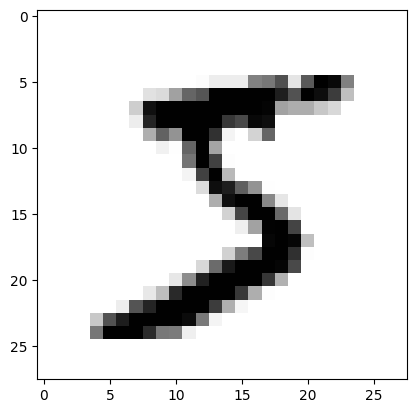

In [ ]:

import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = mnist['data'].iloc[0]
some_digit_reshape = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_reshape , cmap = 'binary')
plt.show()

In [ ]:
# This looks like a 5, and indeed that's what the label tells us:
y.iloc[0]

'5'

In [ ]:
# Note that the label is a string. Most ML algorithms except numbers, so
# let's cast y to integer:
import numpy as np

y = y.astype(dtype = 'int32')

But wait! You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually alerady split into a training set (the first 60,000 images) and a test set ( the last 10,000 images):

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

This training set is already shuffled for us, which is good because this gurantees that all cross-validation folds will be similar.

# Training a Binary Classifier

Let's simplify the problem for now and only try to identify one digit- for example, the number 5. This "5-detector" will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let's create the target vectors for this classification task:

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Now let's pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-learn's SGDClassifier class. This Classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time. Let's create an SGDClassifier and train it on the whole training set:

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

The classifier guesses taht this image represents a 5 (True). Look's like it guess right in this particular case! Now, let's evaluate this model's performance.

# Performance Measures

There are many performance measures avaialable , so grab a cup of coffee and get ready to learn many new concepts and acronyms!

## Measuring Accuracy Using Cross-validation

In [ ]:
# @title Implementing Cross-Validation

"""Ocassionally you will need more control over the cross-validation process
than what Scikit-leran provides off the shelf. In these cases, you can implement
cross-validation yourself. The following code does roughly the same things as
Scikit-learn's cross_val_score() function, and it prints the same result:"""

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5.iloc[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


The **StratifiedKFold** class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of the correct predictions.

Let's use the **cross_val_score()** function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds. remember that K-fold cross-validation means splitting the training set into Kfolds, then making predictions and evaluating them on each fold using a model trained on the remaining folds:


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring ='accuracy')


array([0.95035, 0.96035, 0.9604 ])

Let's look at a very dumb classifier that just classifies every single image in the "not-5" class

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y = None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

That's right , it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

This demonstrates why accuracy is gnerally not the preffered performance measures for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than other classes.)

## Confusion matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets. You could make predictions on the test-set, but let's keep it untouched for now (remember that you want to use the test set at the very end of your project, once you have classifer that you are ready to launch).Instead, you can use the **cross_val_predict()** function::


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

Just Like the **cross_val_score()** function, **cross_val_predict()** performs K-fold cross-validation, but intead of returning the evaluation scores, it returns the predictions made on each test fold.

Now ou are ready to get the confusion matrix using the **confusion_matrix()** function. Just pass it the target classes (y_train_5) and the predicted class (y_train_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An intersting one to look at is the accuracy of the positive predictions, this is called precision of the classifier.

Precision is typically used along with another metric named recall, also called sensitivy of the true positive rate (TPR), this is the ratio of positive instances that are correctly detected by the classifier.

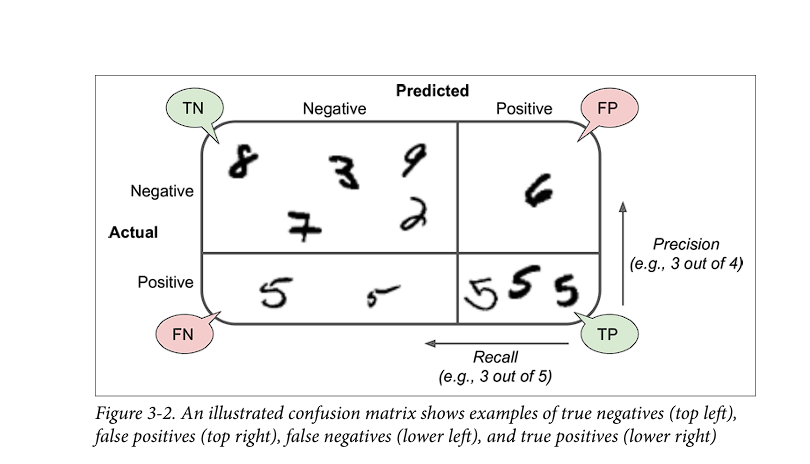

## Precision and Recall

Scikit-learn provides several functions to compute classifier metrics,including precision and recall:

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Now our 5-detector does not look as shiny as it did when we looked at its accuracy. When it claims an image represents a 5, it is correct only 83.7% of the time. More over, it only detects 65.11% of the 5s.

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the **harmonic mean** of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

To cmpute the F1 score, simply call the f1_score() function:

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

The F1 score favors calssifiers that have similar precision and recall. this isnot alwasy what you want: in some contexts you mostly care about precision, and in other context you really care about recall. For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos shwo up in your product (in such cases, you may even want to add a human pipeline to check the classifier's video selection). On the other hand, suppose you train a classifier to detect shoplifters in surviellance images: it is  probably fine if your classifier has only 30% precision as long as it has 99% recall.

Unfortunately, you can't have it both ways: increasing precision reduces recall, and vice versa. This is called the **precision/recall trade off**.

## Precision/Recall trade off

To understand this trade-off, let's look at how the SGDCLassifier makes its calssification decision. For each instane, it computes  a score based on a decision function. if that score is greater than a threshold, it assigns the sinstance to the positive class otherwise it assigns it to the negative class.

Scikit-learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier's predict() method, you can call its decision_function() method, which returns score for each instance, and then use any threshold you want to make predictions based on those score:

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict() method. Let's raise the threshold:


In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 8000.

How do you decide which threshold to use? First, use the cross-val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds.

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

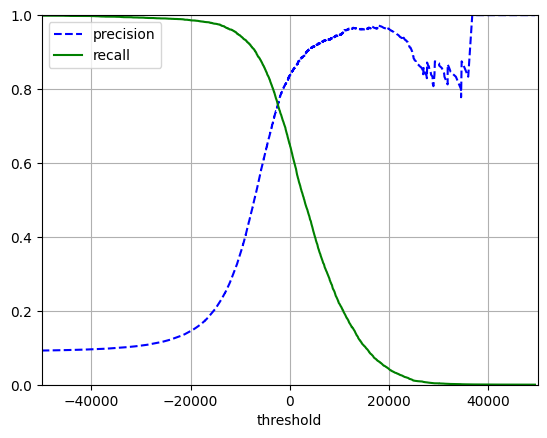

In [ ]:
# Using Matplotlib to plot precision and recall a functions of the threshold
# value

def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
  plt.plot(thresholds, precision[:-1], "b--", label="precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="recall")
  plt.legend()
  plt.xlabel("threshold")
  plt.ylim([0,1])
  plt.xlim([-50000, 50000])
  plt.grid(True)

plt.figsize=(6,10)
plot_precision_recall_vs_threshold(precision, recalls, thresholds)
plt.show()

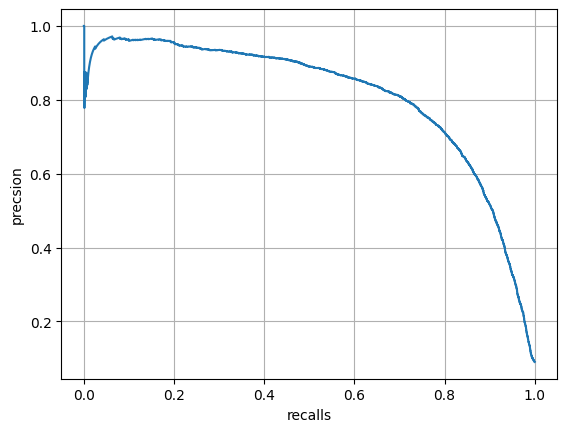

In [ ]:
plt.plot(recalls, precision)
plt.xlabel('recalls')
plt.ylabel('precsion')
plt.grid(True)
plt.show()

You can see that precision really starts to fall sharply around 80% recall. you will probably wan tto select a precision/recall trade- off just before that drop - for example, at around 60% recall. But of course, the choice depends on your project.

Suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8,000. To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give you the first index of the maximum value, which in this case means the first True value):/


In [ ]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)]

To make predictions (on the training set for now), instaed of calling the classifier's predict() method, you can run this code:

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
# Let's check these predictions' precision and recall:

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Great we have a 90% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough  threshold, and you're done. But wait, not so fast. A high-precison classifer is not very useful if its recall is too low!

## The ROC Curve

The **Reciever Operating Characterstic** (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (antoerh name for recall) against the fals positive rate(FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 - the true negative rate(TNR), which is the ration of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) versus 1 - specificity.

To plot the ROC Curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Then you can plot the FPR against the TPR using Matplotlib. This code produces the plt

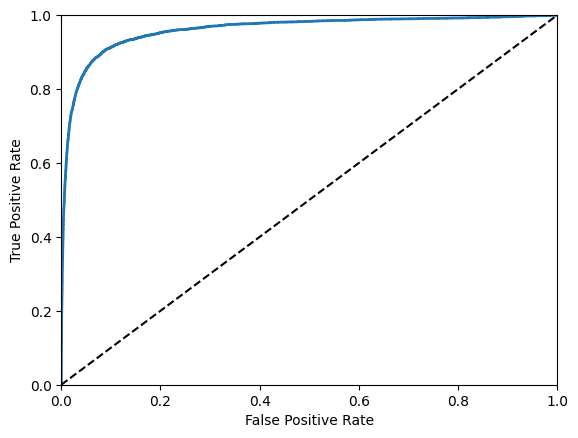

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

Once again there is trade-off: the higher the rcall (TPR), the more false positives (FPR) the classifier produces. The Dotted line represents the ROC curve of a purely random classifer; a good classifier stays as far away fromthat line as possible ( toward the top-left corner).

One way to compare classifier is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal 1, wheres a purely random classifier iwll have a ROC AUC equal to 0.5. Scikit-leran provides a function to compute ROC AUC:


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

PR curve should be used in the case where we have a fewer positive class or when we care more about false positives than the false negatives.

Let's now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. FIrst, you need to get scores for each instance in the training set. But due to the way ti works , The RandomForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method. Scikit-learn classifiers generally have one or the other, or both. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method = 'predict_proba')

The roc_curve(0 function expects labels and scores, but instead of scores you can give it class probabilities. Lets use the positive class's probability as the score.

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

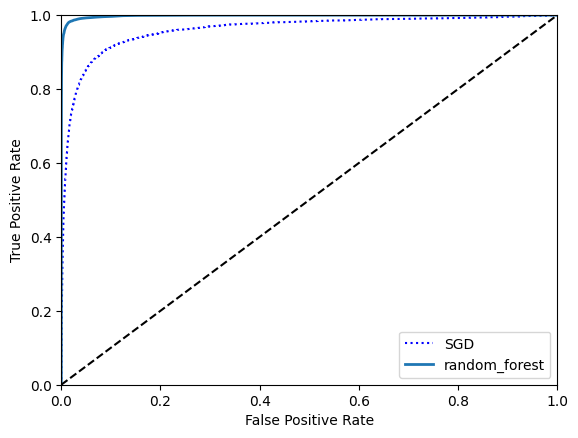

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random_forest")
plt.legend(loc = 'lower right')
plt.show()

As you can see in the plot above, the RandomForestClassifier's ROC curve looks much better than the SGDClassifier's: it comes much closer to the top-left corner. As a result, its ROC AUC score is also significantly better;/


In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

You now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall trade off that fits your needs, and use ROC curves and ROCAUC scores to compare various models, Now let's try to detect mroe than just 5s.